* https://stackoverflow.com/questions/29798795/multivariate-student-t-distribution-with-python
* https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.t.html

In [1]:
from numpy.linalg import inv
import numpy as np
from math import pi, sqrt, gamma
from scipy.stats import t
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# t-distribution
$$
\frac{\Gamma(\frac{\mathbf{v} + 1}{2})}{\sqrt{\mathbf{v} \pi} \times \Gamma(\frac{\mathbf{v}}{2})} (1 + \frac{x^2}{\mathbf{v}})^{-\frac{\mathbf{v} + 1}{2}}
$$

In [3]:
def my_t(x, df):
    _ = (df + 1.)/2.
    return gamma(_) / (sqrt(pi* df) * gamma(df/2.) * (1. + x**2/df) ** (_))

In [4]:
def my_t(x, df):
    _ = lambda x : (df + x)/2.
    return gamma(_(1)) / (sqrt(pi* df) * gamma(_(0)) * (1. + x**2/df) ** (_(1)))

In [5]:
my_t(0, 2.74)

0.36480344404681464

In [6]:
rv = t(2.74)
rv.pdf(0)

0.36480344404681475

---

# Multivariate t-distribution
$$
f(y; \mu, \Sigma, \mathbf{v}) =
\frac{
\Gamma(\frac{\mathbf{v} + p}{2}) |\Sigma|^{-1/2}}
{
(\pi \mathbf{v})^{p/2}
\Gamma(\frac{\mathbf{v}}{2})
(1 + \delta(y, \mu; \Sigma)/\mathbf{v})^{\frac{\mathbf{v}+p}{2}}
}
$$
where
$$
\delta(y, \mu; \Sigma) = (y-\mu)^T \Sigma^{-1} (y-\mu)
$$

In [7]:
def squared_distance(x, mu, sigma):
    diff = (x - mu)
    return diff.dot(inv(sigma)).dot(diff.T)

In [8]:
def multivariate(x, mu, sigma, df):
    p = x.shape[1]
    
    f = lambda _ : (df+_)/2.
    
    det = np.linalg.det(sigma) ** (-1./2.)
    
    param0 = gamma(f(p))
    param1 = (np.pi * df) ** (-p/2.)
    param2 = gamma(f(0)) ** -1.
    
    delta = x - mu
    param3 = 1. + (delta.dot(inv(sigma)).dot(delta.T))/df
    param3 = param3 ** (-f(p))
    
    #return param3
    return param0 * det * param1 * param2 * param3

---

In [12]:
np.linalg.det([[1,0],[0,1]]) ** (-1./2.)

1.0

In [18]:
x = np.array([1,1])
mu = np.array([3,3])

In [19]:
dec = np.linalg.cholesky([[1,0],[0,1]])

In [22]:
(np.linalg.solve(dec, x - mu) ** 2).sum(axis=0)

8.0

In [11]:
multivariate(np.array([[1,1]]), [3,3], [[1,0],[0,1]], 1)

array([[ 0.00589463]])

In [143]:
x1, y1 = np.mgrid[-2.5:2.5:.01, -2.5:2.5:.01]

In [176]:
XY = []
for xy in zip(x1, y1):
    sample = np.array(xy).T
    xy_ = []
    for _ in sample:
        l = multivariate(_.reshape(1,-1), [.0,.0],[[1.,0.],[0,1.]],100)
        xy_.extend(l[0])

    XY.append(xy_)

XY = np.array(XY)
print XY.shape

(500L, 500L)


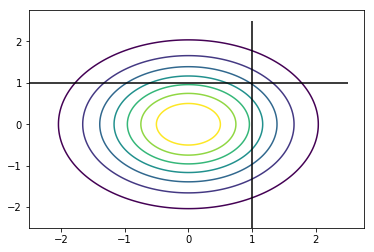

In [177]:
plt.contour(x1, y1, XY)
plt.hlines(1, -2.5, 2.5)
plt.vlines(1, -2.5, 2.5)
plt.show()

---

In [162]:
x1, y1 = np.mgrid[-2.5:2.5:.01, -2.5:2.5:.01]

In [180]:
XY = []
for xy in zip(x1, y1):
    sample = np.array(xy).T
    xy_ = []
    for _ in sample:
        l = multivariate(_.reshape(1,-1), [.0,.0],[[.1,.0],[.0,.2]],100)
        xy_.extend(l[0])

    XY.append(xy_)

XY = np.array(XY)
print XY.shape

(500L, 500L)


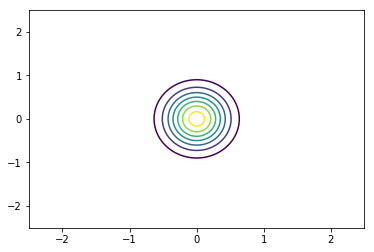

In [181]:
plt.contour(x1, y1, XY)
plt.show()

* https://github.com/statsmodels/statsmodels/blob/master/statsmodels/sandbox/distributions/multivariate.py#L90

In [151]:
#written by Enzo Michelangeli, style changes by josef-pktd
# Student's T random variable
def multivariate_t_rvs(m, S, df=np.inf, n=1):
    '''generate random variables of multivariate t distribution
    Parameters
    ----------
    m : array_like
        mean of random variable, length determines dimension of random variable
    S : array_like
        square array of covariance  matrix
    df : int or float
        degrees of freedom
    n : int
        number of observations, return random array will be (n, len(m))
    Returns
    -------
    rvs : ndarray, (n, len(m))
        each row is an independent draw of a multivariate t distributed
        random variable
    '''
    m = np.asarray(m)
    d = len(m)
    if df == np.inf:
        x = 1.
    else:
        x = np.random.chisquare(df, n)/df
    z = np.random.multivariate_normal(np.zeros(d),S,(n,))
    return m + z/np.sqrt(x)[:,None]   # same output format as random.multivariate_normal

In [156]:
x1 = multivariate_t_rvs([0,0], [[1,0],[0,1]],9, 300)
x2 = multivariate_t_rvs([1.5,1.5], [[.5,1.],[.1,.7]],9, 300)

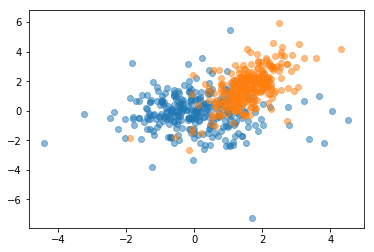

In [161]:
plt.scatter(x1[:,0], x1[:,1], alpha=.5)
plt.scatter(x2[:,0], x2[:,1], alpha=.5)

EM Algorithm for ML estimation of the parameters $\mu$ and $\Sigma$ with known degree of freedom.